# (Multi)LineString `_duplicated_coordinates_list`
Function returns a list of all coordinates for (Multi)LineString features that are duplicated.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

os.getcwd()

'/home/lukasz/Projects/geonurse/notebooks'

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint

from geonurse.tools.linestring import has_duplicates, _duplicated_coordinates_list

## Load data

In [4]:
DATA_PATH = '../tests/tools/linestring/data'

### Features with duplicates

#### Read data

In [5]:
linestrings_with_duplicates = gpd.read_file(os.path.join(DATA_PATH, 'expected_linestring_with_duplicates.geojson'))

In [6]:
linestrings_with_duplicates.head()

,descriptio,id,geometry
0,line1 dupl,3,"(LINESTRING (-13.41666666666667 6.825, -13.416..."
1,line1 ring 1dupl,4,(LINESTRING (-19.12916666666668 6.883333333333...
2,mpoly 1left dupl,6,"(LINESTRING (-1.225 12.19166666666667, -1.225 ..."
3,mpoly 1left 1right dupl,7,(LINESTRING (-9.858333333333334 12.19166666666...
4,mpoly 2left 2right dupl,8,(LINESTRING (-19.13333333333334 12.19166666666...


#### Plot data

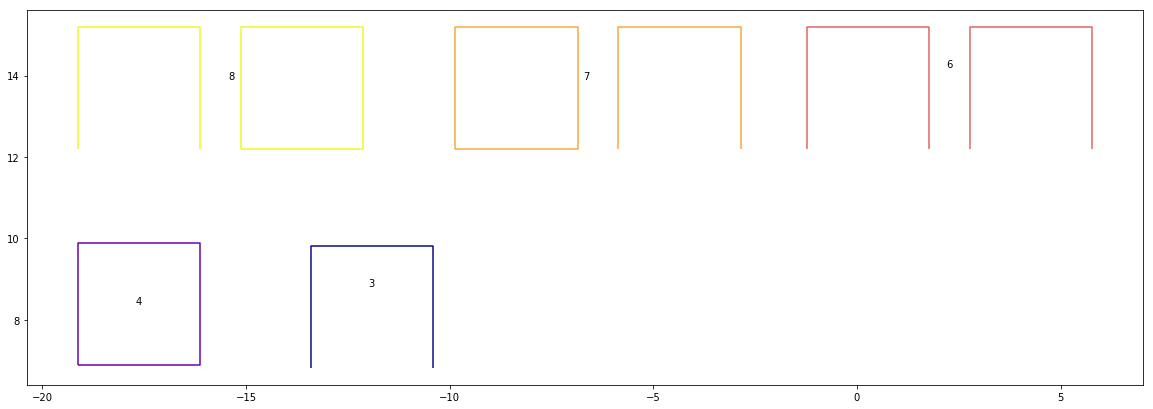

In [7]:
ax = linestrings_with_duplicates.plot(figsize=(20,20), column='id', cmap='plasma')

linestrings_with_duplicates.apply(lambda x: ax.annotate(s=x.id, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
print()

#### Find duplicates

In [15]:
duplicated_coordinates = linestrings_with_duplicates.geometry.apply(_duplicated_coordinates_list).apply(MultiPoint)

assert len(linestrings_with_duplicates) == len(duplicated_coordinates)

In [30]:
duplicated_coordinates

0       (POINT (-10.41666666666667 9.824999999999999))
1       (POINT (-16.12916666666668 9.883333333333336))
2                    (POINT (1.775 15.19166666666667))
3    (POINT (-6.858333333333334 15.19166666666667),...
4    (POINT (-19.13333333333334 15.19166666666667),...
Name: geometry, dtype: object

#### Plot filtered geometries

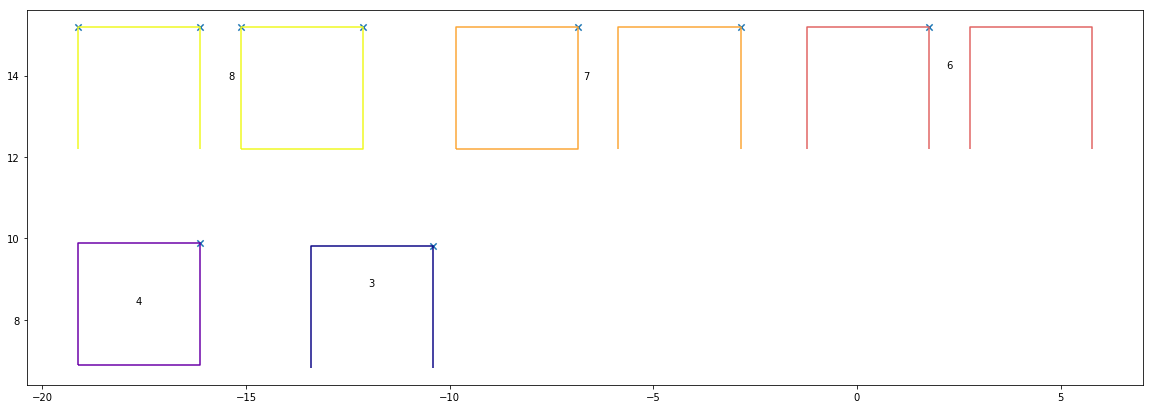

In [26]:
ax = duplicated_coordinates.plot(figsize=(20,20), marker='x', markersize=40) #, column='id', cmap='plasma')

linestrings_with_duplicates.plot(ax=ax, column='id', cmap='plasma')

linestrings_with_duplicates.apply(lambda x: ax.annotate(s=x.id, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
print()

#### Compare with EXPECTED data

In [27]:
expected_duplicates = gpd.read_file(os.path.join(DATA_PATH, 'expected_linestring_duplicates.geojson'))

In [32]:
expected_duplicates

,descriptio,id,vertex_ind,vertex_par,vertex_p_1,distance,angle,geometry
0,line1 dupl,3,2,0,2,6.0,90.0,POINT (-10.41666666666667 9.824999999999999)
1,line1 ring 1dupl,4,2,0,2,6.0,90.0,POINT (-16.12916666666668 9.883333333333336)
2,mpoly 1left dupl,6,3,0,3,6.0,135.0,POINT (1.775 15.19166666666667)
3,mpoly 1left 1right dupl,7,3,0,3,6.0,135.0,POINT (-6.858333333333334 15.19166666666667)
4,mpoly 1left 1right dupl,7,9,1,3,18.0,135.0,POINT (-2.858333333333334 15.19166666666667)
5,mpoly 2left 2right dupl,8,2,0,2,3.0,90.0,POINT (-19.13333333333334 15.19166666666667)
6,mpoly 2left 2right dupl,8,4,0,4,6.0,135.0,POINT (-16.13333333333334 15.19166666666667)
7,mpoly 2left 2right dupl,8,8,1,2,12.0,90.0,POINT (-15.13333333333334 15.19166666666667)
8,mpoly 2left 2right dupl,8,10,1,4,15.0,135.0,POINT (-12.13333333333334 15.19166666666667)


NOTE:
In order to compare the result `duplicated_coordinates` geopandas.GeoSeries has to be exploded. This will split multipart features into singlepart onces.

In [37]:
assert len(expected_duplicates) == len(duplicated_coordinates.explode())

In [38]:
type(expected_duplicates)

geopandas.geodataframe.GeoDataFrame

In [39]:
type(duplicated_coordinates.explode())

geopandas.geoseries.GeoSeries

In [49]:
duplicated_coordinates_geoseries = gpd.GeoSeries(
    duplicated_coordinates
        .explode()
        .reset_index()
        .drop(['level_0', 'level_1'], axis=1)
        .geometry
)

In [50]:
from pandas.testing import assert_series_equal

In [51]:
assert_series_equal(duplicated_coordinates_geoseries, expected_duplicates.geometry, check_index_type=False)